In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
df=pd.read_csv("Mall_Customers.csv")
df.head()


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19.0,15,39
1,2,Male,21.0,15,81
2,3,Female,20.0,16,6
3,4,Female,23.0,16,77
4,5,Female,31.0,17,40


In [4]:
df.shape

(200, 5)

In [5]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,198.000000,200.000000,200.000000
mean,100.500000,38.868687,60.560000,50.200000
std,57.879185,13.956893,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,29.000000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [6]:
df.dtypes

CustomerID                  int64
Gender                     object
Age                       float64
Annual Income (k$)          int64
Spending Score (1-100)      int64
dtype: object

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   CustomerID              200 non-null    int64  
 1   Gender                  200 non-null    object 
 2   Age                     198 non-null    float64
 3   Annual Income (k$)      200 non-null    int64  
 4   Spending Score (1-100)  200 non-null    int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 7.9+ KB


In [8]:
updated_df = df
updated_df['Age']=updated_df['Age'].fillna(updated_df['Age'].mean())
updated_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   CustomerID              200 non-null    int64  
 1   Gender                  200 non-null    object 
 2   Age                     200 non-null    float64
 3   Annual Income (k$)      200 non-null    int64  
 4   Spending Score (1-100)  200 non-null    int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 7.9+ KB


In [9]:
df.corr()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,1.000000,-0.030197,0.977548,0.013835
Age,-0.030197,1.000000,-0.015800,-0.319169
Annual Income (k$),0.977548,-0.015800,1.000000,0.009903
Spending Score (1-100),0.013835,-0.319169,0.009903,1.000000


<AxesSubplot:>

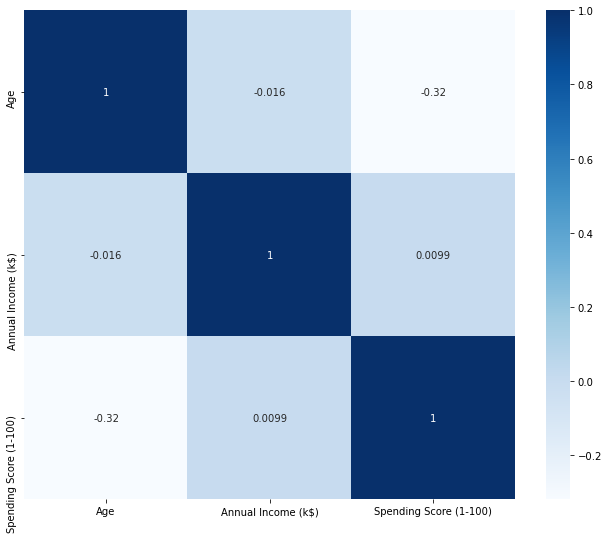

In [10]:
updated_df=df.drop(columns="CustomerID", axis=1)
plt.figure(figsize=(11,9))
sns.heatmap(updated_df.corr(), annot=True, cmap='Blues')

In [11]:
updated_df=df.drop(columns="CustomerID", axis=1)
corr_matrix=updated_df.corr()
corr_matrix["Annual Income (k$)"].sort_values(ascending=False)

Annual Income (k$)        1.000000
Spending Score (1-100)    0.009903
Age                      -0.015800
Name: Annual Income (k$), dtype: float64

array([[<AxesSubplot:xlabel='Annual Income (k$)', ylabel='Annual Income (k$)'>,
        <AxesSubplot:xlabel='Spending Score (1-100)', ylabel='Annual Income (k$)'>,
        <AxesSubplot:xlabel='Age', ylabel='Annual Income (k$)'>],
       [<AxesSubplot:xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>,
        <AxesSubplot:xlabel='Spending Score (1-100)', ylabel='Spending Score (1-100)'>,
        <AxesSubplot:xlabel='Age', ylabel='Spending Score (1-100)'>],
       [<AxesSubplot:xlabel='Annual Income (k$)', ylabel='Age'>,
        <AxesSubplot:xlabel='Spending Score (1-100)', ylabel='Age'>,
        <AxesSubplot:xlabel='Age', ylabel='Age'>]], dtype=object)

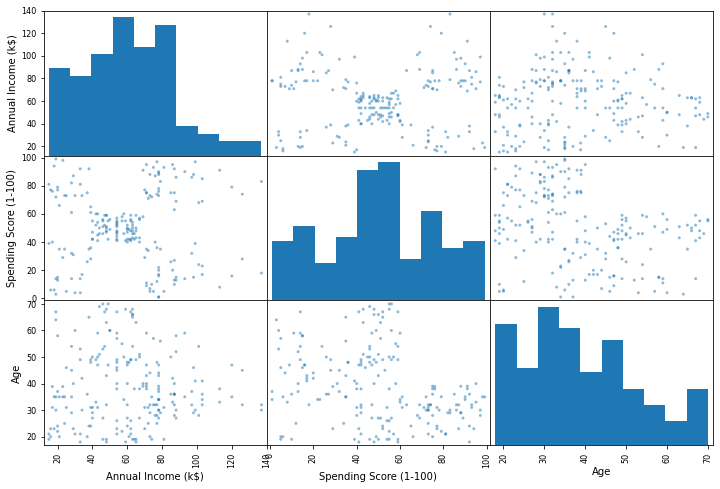

In [12]:
from pandas.plotting import scatter_matrix
attributes = ["Annual Income (k$)","Spending Score (1-100)","Age"]
scatter_matrix(df[attributes],figsize=(12,8))

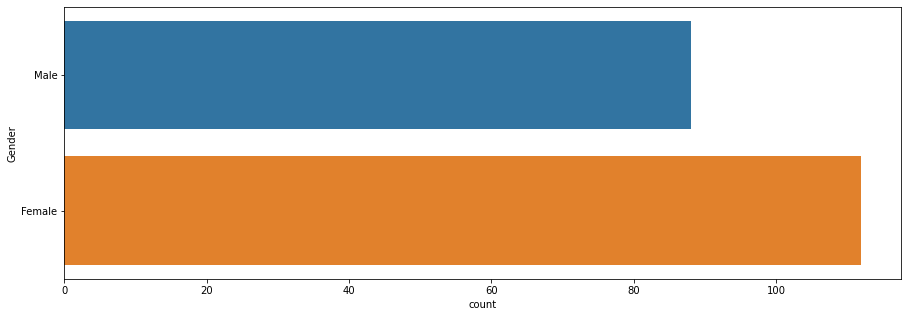

In [13]:
plt.figure(figsize=(15,5))
sns.countplot(y="Gender",data=df)
plt.show()

In [14]:
Age=df["Age"]

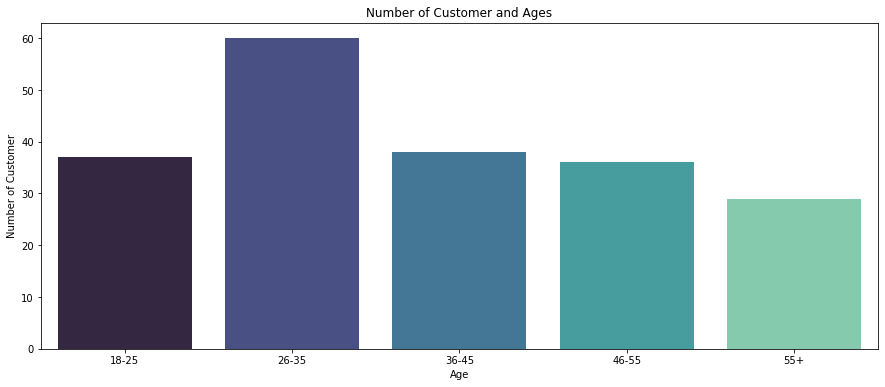

In [15]:
age_18_25 = df.Age[ (df.Age >=18) & (df.Age <= 25)]
age_26_35 = df.Age[ (df.Age >= 26) & (df.Age<= 35)]
age_36_45 = df.Age[ (df.Age >= 36) & (df.Age <=45)]
age_46_55 = df.Age[ (df.Age >=46) & (df.Age <= 55)]
age_55above = df.Age[df.Age >= 56]
agex = ["18-25","26-35","36-45","46-55","55+"]
agey= [len(age_18_25.values),len(age_26_35.values),len(age_36_45.values),len(age_46_55.values),len(age_55above.values)]
plt.figure(figsize=(15,6))
sns.barplot (x=agex, y=agey, palette="mako")
plt.title("Number of Customer and Ages")
plt.xlabel("Age")
plt.ylabel ("Number of Customer")
plt.show()

In [21]:
X2=df.loc[:,["Annual Income (k$)","Spending Score (1-100)"]].values

In [22]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5)
lable = kmeans.fit_predict(X2)
print(lable)


[4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4
 2 4 2 4 2 4 1 4 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 3 0 3 1 3 0 3 0 3 1 3 0 3 0 3 0 3 0 3 1 3 0 3 0 3
 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0
 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3]


In [23]:
print(kmeans.cluster_centers_)

[[88.2        17.11428571]
 [55.2962963  49.51851852]
 [25.72727273 79.36363636]
 [86.53846154 82.12820513]
 [26.30434783 20.91304348]]


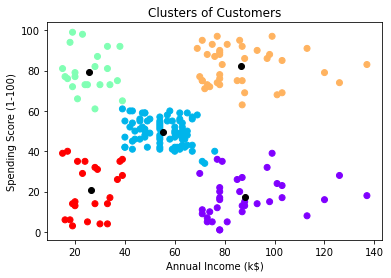

In [24]:
plt.scatter(X2[:,0],X2[:,1],c=kmeans.labels_,cmap="rainbow")
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],color='black')
plt.title('Clusters of Customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()